# Data Analysis of Udemy Courses

## Library Imports

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
sns.set(style = "whitegrid", font = "sans-serif", palette = "Dark2", font_scale = 1.1)

## Importing the Dataset

In [2]:
udemy_DF = pd.read_csv('../input/udemy-courses/udemy_courses.csv')

# Overview of the Dataset

In [3]:
udemy_DF.shape

(3678, 12)

There are 3678 rows and 12 columns.

In [4]:
udemy_DF.head(10)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
5,192870,Trading Penny Stocks: A Guide for All Levels I...,https://www.udemy.com/trading-penny-stocks-a-g...,True,150,9221,138,25,All Levels,3.0,2014-05-02T15:13:30Z,Business Finance
6,739964,Investing And Trading For Beginners: Mastering...,https://www.udemy.com/investing-and-trading-fo...,True,65,1540,178,26,Beginner Level,1.0,2016-02-21T18:23:12Z,Business Finance
7,403100,"Trading Stock Chart Patterns For Immediate, Ex...",https://www.udemy.com/trading-chart-patterns-f...,True,95,2917,148,23,All Levels,2.5,2015-01-30T22:13:03Z,Business Finance
8,476268,Options Trading 3 : Advanced Stock Profit and ...,https://www.udemy.com/day-trading-stock-option...,True,195,5172,34,38,Expert Level,2.5,2015-05-28T00:14:03Z,Business Finance
9,1167710,The Only Investment Strategy You Need For Your...,https://www.udemy.com/the-only-investment-stra...,True,200,827,14,15,All Levels,1.0,2017-04-18T18:13:32Z,Business Finance


# Data Preparation

In [5]:
udemy_DF.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

There are no NaNs in this dataset.

## Checking for Courses with no Lectures

In [6]:
udemy_DF[udemy_DF['num_lectures'] == 0]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
892,627332,Mutual Funds for Investors in Retirement Accounts,https://www.udemy.com/mutual-funds-for-investo...,True,20,0,0,0,All Levels,0.0,2015-12-17T05:38:38Z,Business Finance


In [7]:
udemy_DF.drop(udemy_DF[udemy_DF['num_lectures'] == 0].index, inplace = True)

One course named "Mutual Funds for Investors in Retirement Accounts" has been removed.

## Extracting the Year from the Date

In [8]:
udemy_DF['published_timestamp'] = pd.to_datetime(udemy_DF['published_timestamp'])
udemy_DF['published_date'] = udemy_DF['published_timestamp'].dt.date
udemy_DF['published_year'] = pd.DatetimeIndex(udemy_DF['published_date']).year

In [9]:
udemy_DF.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_date,published_year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017-01-18,2017
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,2017-03-09,2017
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,2016-12-19,2016
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,2017-05-30,2017
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,2016-12-13,2016


# Analyzing All the Features

## Subjects

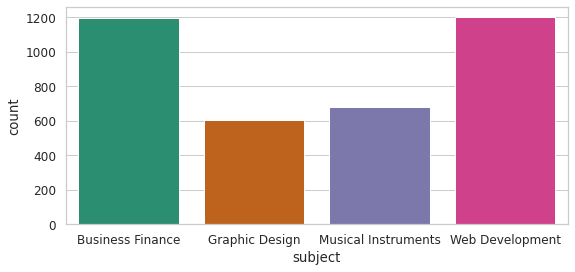

In [10]:
plt.figure(figsize = (9,4))
sns.countplot(data = udemy_DF, x = 'subject')
plt.show()

Majority of the courses fall under Web Development (32.6%) and Business Finance (32.5%).

## Difficulty Levels

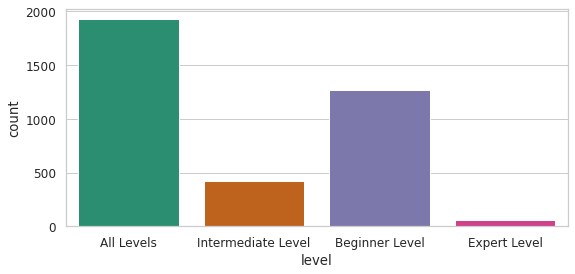

In [11]:
plt.figure(figsize = (9,4))
sns.countplot(data = udemy_DF, x = 'level')
plt.show()

52.4% of all courses have all the difficulty levels. 34.5% of all courses are at a beginner level.

## Paid and Free Courses

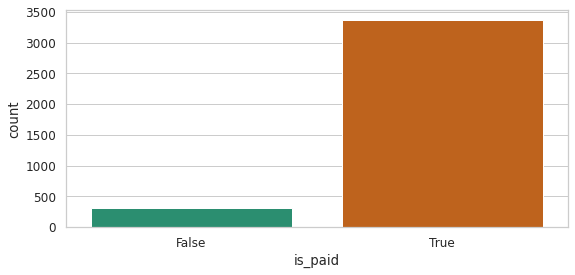

In [12]:
plt.figure(figsize = (9,4))
sns.countplot(data = udemy_DF, x = 'is_paid')
plt.show()

91.6% of all Udemy courses are paid.

## Year of Publishing

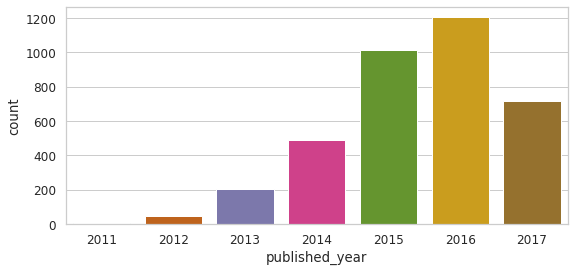

In [13]:
plt.figure(figsize = (9,4))
sns.countplot(data = udemy_DF, x = 'published_year')
plt.show()

In [14]:
udemy_DF.nlargest(5, 'published_timestamp')

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_date,published_year
455,1282064,Cryptocurrency (BTC & ETH) Investment & Tradin...,https://www.udemy.com/cryptocurrency-btc-eth-i...,True,20,0,0,7,Beginner Level,2.500000,2017-07-06 21:46:30+00:00,Business Finance,2017-07-06,2017
462,1187084,Forex how traders beat the markest with little...,https://www.udemy.com/forex-how-traders-beat-t...,True,100,0,0,16,All Levels,1.000000,2017-07-06 21:16:13+00:00,Business Finance,2017-07-06,2017
1108,1268616,Condor Broken Wing Butterfly Options Trading C...,https://www.udemy.com/condor-broken-wing-butte...,False,0,16,0,15,All Levels,1.500000,2017-07-06 19:47:16+00:00,Business Finance,2017-07-06,2017
2405,1265814,ABRSM Grade III Piano Class - Handel Sonatina ...,https://www.udemy.com/abrsm-grade-iii-piano-cl...,True,20,0,0,5,Beginner Level,0.516667,2017-07-06 16:12:34+00:00,Musical Instruments,2017-07-06,2017
2645,1277924,Angular 4 Front To Back,https://www.udemy.com/angular-4-front-to-back/,True,40,44,0,68,All Levels,8.500000,2017-07-06 15:04:55+00:00,Web Development,2017-07-06,2017


This dataset has courses published till 2017. There is a substantial increase in the number of courses published every year, due to the increase in popularity of online courses. The decrease in 2017 can be attributed to the fact the last recorded course was published on 6 July 2017, as visible in the above table. 32.8% of all courses were published in 2016.

## Course Price

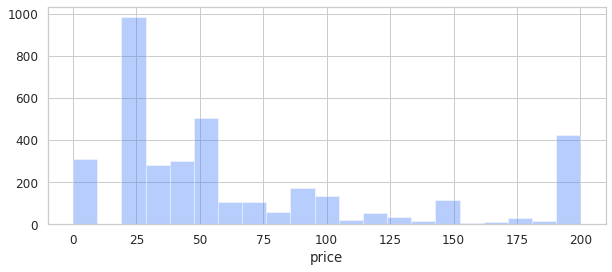

In [15]:
plt.figure(figsize = (10,4))
sns.distplot(udemy_DF['price'], color = "#4c84f5", kde = False)
plt.show()

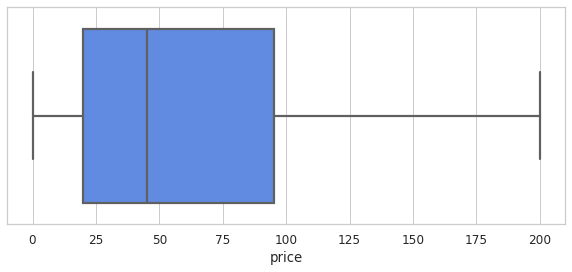

In [16]:
plt.figure(figsize = (10,4))
sns.boxplot(udemy_DF['price'], color = "#4c84f5", linewidth = 2.2)
plt.show()

The maximum price for courses is 200 dollars. The average price for all courses is 66.06 dollars. The middle 50% of the prices lie between 20 and 95 dollars.

## Number of Subscribers

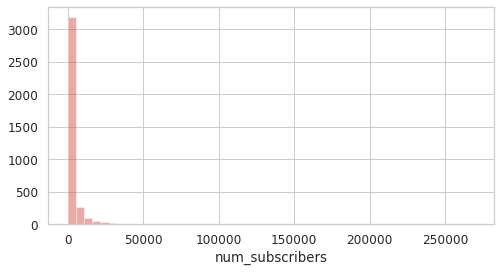

In [17]:
plt.figure(figsize = (8,4))
sns.distplot(udemy_DF['num_subscribers'], color = "#c92c26", kde = False)
plt.show()

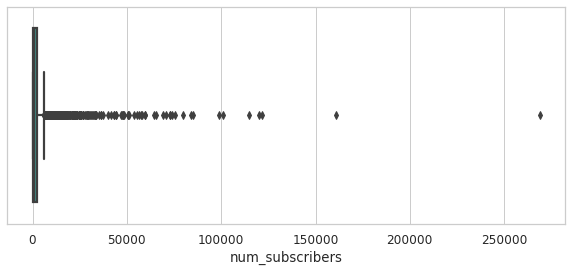

In [18]:
plt.figure(figsize = (10,4))
sns.boxplot(udemy_DF['num_subscribers'], color = "#359c91", linewidth = 2.2)
plt.show()

There is a large number of outliers in terms of subscribers.

## Number of Reviews

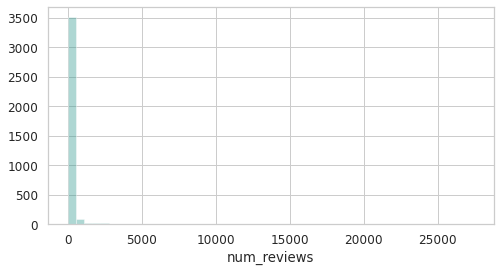

In [19]:
plt.figure(figsize = (8,4))
sns.distplot(udemy_DF['num_reviews'], color = "#359c91", kde = False)
plt.show()

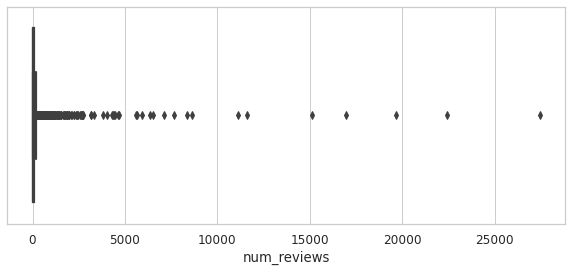

In [20]:
plt.figure(figsize = (10,4))
sns.boxplot(udemy_DF['num_reviews'], color = "#359c91", linewidth = 2.2)
plt.show()

In [21]:
udemy_DF['num_reviews'].describe()

count     3677.000000
mean       156.301605
std        935.575723
min          0.000000
25%          4.000000
50%         18.000000
75%         67.000000
max      27445.000000
Name: num_reviews, dtype: float64

The highest number of reviews is 27,445. The average number of reviews is 156.

## Number of Lectures

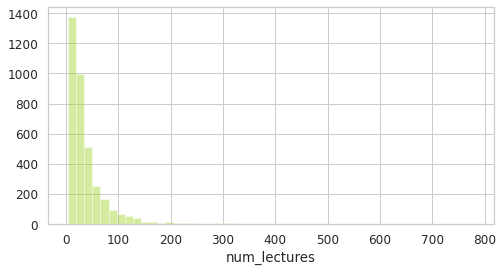

In [22]:
plt.figure(figsize = (8,4))
sns.distplot(udemy_DF['num_lectures'], color = "#94d111", kde = False)
plt.show()

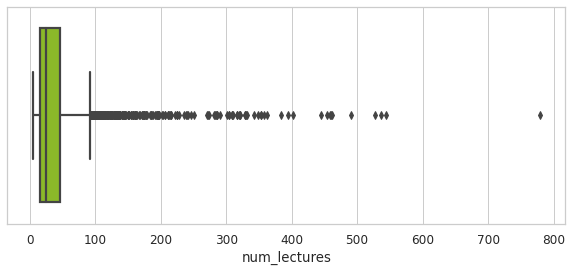

In [23]:
plt.figure(figsize = (10,4))
sns.boxplot(udemy_DF['num_lectures'], color = "#94d111", linewidth = 2.2)
plt.show()

In [24]:
udemy_DF['num_lectures'].describe()

count    3677.000000
mean       40.119663
std        50.385854
min         4.000000
25%        15.000000
50%        25.000000
75%        46.000000
max       779.000000
Name: num_lectures, dtype: float64

The highest amount of lecture videos in a course is 779. The average number of lecture videos is 40.

## Content Duration

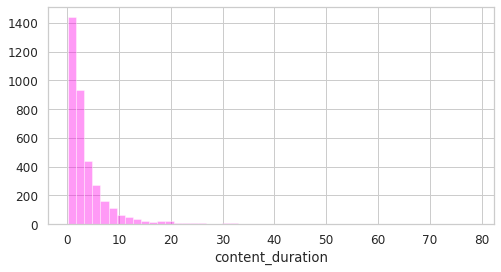

In [25]:
plt.figure(figsize = (8,4))
sns.distplot(udemy_DF['content_duration'], color = "#ff03ea", kde = False)
plt.show()

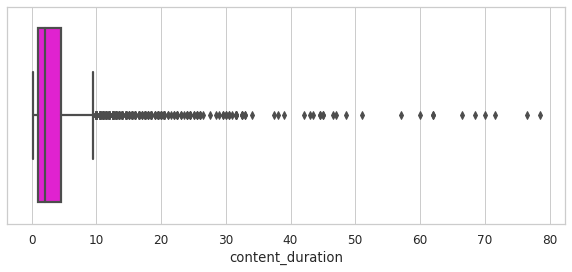

In [26]:
plt.figure(figsize = (10,4))
sns.boxplot(udemy_DF['content_duration'], color = "#ff03ea", linewidth = 2.2)
plt.show()

In [27]:
udemy_DF['content_duration'].describe()

count    3677.000000
mean        4.095630
std         6.054287
min         0.133333
25%         1.000000
50%         2.000000
75%         4.500000
max        78.500000
Name: content_duration, dtype: float64

The longest duration for a course is 78.5 hours. The shortest course is 0.133 hours, which equates to approximately 8 minutes.

# Most Subscribed Courses

## Top 10 Most Subscribed Courses

In [28]:
udemy_DF.nlargest(10, 'num_subscribers')

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_date,published_year
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14 07:03:41+00:00,Web Development,2013-02-14,2013
3032,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,False,0,161029,279,27,Beginner Level,3.5,2013-06-09 15:51:55+00:00,Web Development,2013-06-09,2013
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02 21:13:27+00:00,Web Development,2015-11-02,2015
2783,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,False,0,120291,5924,30,Beginner Level,3.0,2014-04-08 16:21:30+00:00,Web Development,2014-04-08,2014
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,2016-03-08 22:28:36+00:00,Web Development,2016-03-08,2016
1896,19421,Free Beginner Electric Guitar Lessons,https://www.udemy.com/beginner-electric-guitar...,False,0,101154,1042,95,Beginner Level,4.5,2012-06-15 17:00:33+00:00,Musical Instruments,2012-06-15,2012
2589,473160,Web Design for Web Developers: Build Beautiful...,https://www.udemy.com/web-design-secrets/,False,0,98867,6512,20,All Levels,3.0,2015-04-13 18:29:47+00:00,Web Development,2015-04-13,2015
2619,94430,Learn Javascript & JQuery From Scratch,https://www.udemy.com/learn-javascript-jquery-...,True,30,84897,2685,10,All Levels,2.0,2013-10-10 15:19:29+00:00,Web Development,2013-10-10,2013
3289,130064,Practical PHP: Master the Basics and Code Dyna...,https://www.udemy.com/code-dynamic-websites/,False,0,83737,4598,45,All Levels,6.5,2014-07-19 03:02:05+00:00,Web Development,2014-07-19,2014
3247,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,True,175,79612,16976,85,All Levels,11.5,2015-03-12 23:19:54+00:00,Web Development,2015-03-12,2015


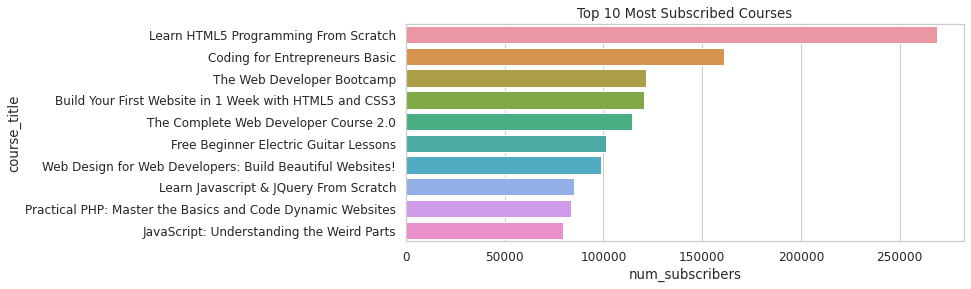

In [29]:
plt.figure(figsize = (10, 4))
sns.barplot(data = udemy_DF.nlargest(10, 'num_subscribers'), 
            x = 'num_subscribers', y = 'course_title')
plt.title(label = "Top 10 Most Subscribed Courses")
plt.show()

## Top 10 Most Subscribed Paid Courses

In [30]:
udemy_DF[udemy_DF['is_paid'] == True].nlargest(10, 'num_subscribers')

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_date,published_year
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02 21:13:27+00:00,Web Development,2015-11-02,2015
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,2016-03-08 22:28:36+00:00,Web Development,2016-03-08,2016
2619,94430,Learn Javascript & JQuery From Scratch,https://www.udemy.com/learn-javascript-jquery-...,True,30,84897,2685,10,All Levels,2.0,2013-10-10 15:19:29+00:00,Web Development,2013-10-10,2013
3247,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,True,175,79612,16976,85,All Levels,11.5,2015-03-12 23:19:54+00:00,Web Development,2015-03-12,2015
1979,238934,Pianoforall - Incredible New Way To Learn Pian...,https://www.udemy.com/pianoforall-incredible-n...,True,200,75499,7676,362,All Levels,30.0,2014-08-07 06:27:51+00:00,Musical Instruments,2014-08-07,2014
3204,756150,Angular 4 (formerly Angular 2) - The Complete ...,https://www.udemy.com/the-complete-guide-to-an...,True,190,73783,19649,329,All Levels,22.0,2016-02-11 07:29:29+00:00,Web Development,2016-02-11,2016
2701,11174,Become a Web Developer from Scratch,https://www.udemy.com/how-to-become-a-web-deve...,True,120,69186,2408,197,All Levels,27.5,2011-11-19 21:51:20+00:00,Web Development,2011-11-19,2011
3246,289230,Learn and Understand AngularJS,https://www.udemy.com/learn-angularjs/,True,175,59361,11580,55,All Levels,7.0,2014-09-24 00:57:25+00:00,Web Development,2014-09-24,2014
3251,461160,Learn and Understand NodeJS,https://www.udemy.com/understand-nodejs/,True,195,58208,11123,98,All Levels,13.0,2015-08-31 21:07:48+00:00,Web Development,2015-08-31,2015
2662,556248,The Complete HTML & CSS Course - From Novice T...,https://www.udemy.com/htmlwebsite/,True,195,57422,874,84,All Levels,7.5,2015-07-27 16:57:52+00:00,Web Development,2015-07-27,2015


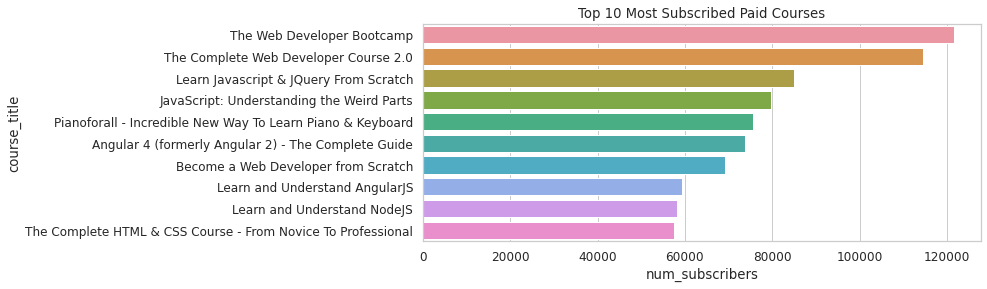

In [31]:
plt.figure(figsize = (10, 4))
sns.barplot(data = udemy_DF[udemy_DF['is_paid'] == True].nlargest(10, 'num_subscribers'), 
            x = 'num_subscribers', y = 'course_title')
plt.title(label = "Top 10 Most Subscribed Paid Courses")
plt.show()

## Top 10 Most Subscribed Free Courses

In [32]:
udemy_DF[udemy_DF['is_paid'] == False].nlargest(10, 'num_subscribers')

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_date,published_year
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14 07:03:41+00:00,Web Development,2013-02-14,2013
3032,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,False,0,161029,279,27,Beginner Level,3.5,2013-06-09 15:51:55+00:00,Web Development,2013-06-09,2013
2783,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,False,0,120291,5924,30,Beginner Level,3.0,2014-04-08 16:21:30+00:00,Web Development,2014-04-08,2014
1896,19421,Free Beginner Electric Guitar Lessons,https://www.udemy.com/beginner-electric-guitar...,False,0,101154,1042,95,Beginner Level,4.5,2012-06-15 17:00:33+00:00,Musical Instruments,2012-06-15,2012
2589,473160,Web Design for Web Developers: Build Beautiful...,https://www.udemy.com/web-design-secrets/,False,0,98867,6512,20,All Levels,3.0,2015-04-13 18:29:47+00:00,Web Development,2015-04-13,2015
3289,130064,Practical PHP: Master the Basics and Code Dyna...,https://www.udemy.com/code-dynamic-websites/,False,0,83737,4598,45,All Levels,6.5,2014-07-19 03:02:05+00:00,Web Development,2014-07-19,2014
3665,21386,Beginner Photoshop to HTML5 and CSS3,https://www.udemy.com/psd-html5-css3/,False,0,73110,1716,22,All Levels,2.0,2012-07-27 12:54:57+00:00,Web Development,2012-07-27,2012
2782,65330,Web Development By Doing: HTML / CSS From Scratch,https://www.udemy.com/web-development-learn-by...,False,0,72932,2575,21,Beginner Level,1.0,2013-09-25 00:42:09+00:00,Web Development,2013-09-25,2013
3325,405926,HTML and CSS for Beginners - Build a Website &...,https://www.udemy.com/html-and-css-for-beginne...,False,0,70773,5660,50,All Levels,6.0,2015-03-19 19:07:12+00:00,Web Development,2015-03-19,2015
492,49798,Bitcoin or How I Learned to Stop Worrying and ...,https://www.udemy.com/bitcoin-or-how-i-learned...,False,0,65576,936,24,All Levels,8.0,2013-04-20 02:25:22+00:00,Business Finance,2013-04-20,2013


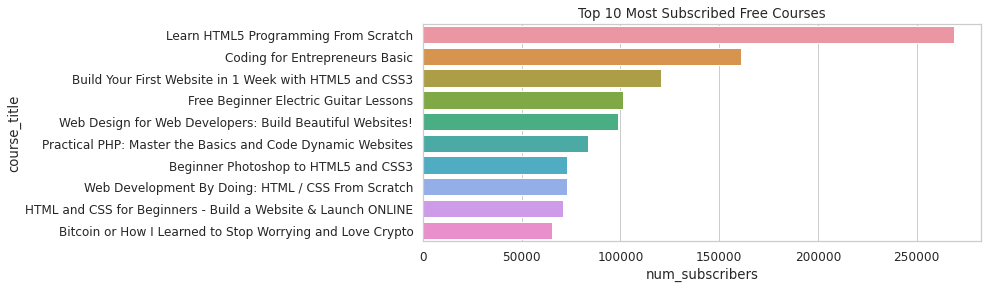

In [33]:
plt.figure(figsize = (10, 4))
sns.barplot(data = udemy_DF[udemy_DF['is_paid'] == False].nlargest(10, 'num_subscribers'), 
            x = 'num_subscribers', y = 'course_title')
plt.title(label = "Top 10 Most Subscribed Free Courses")
plt.show()

## Top 10 Most Subscribed Courses in terms of Subject 

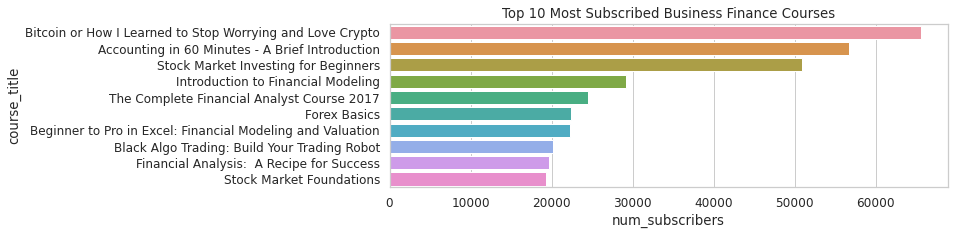

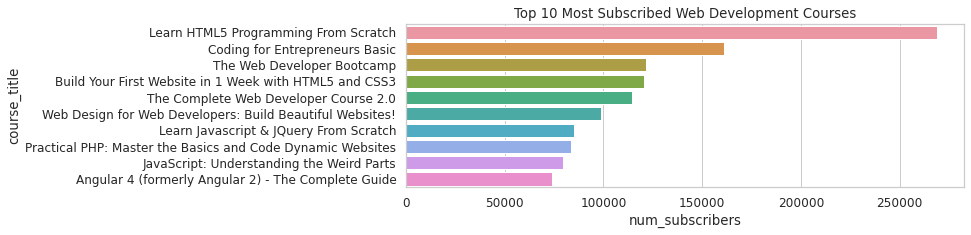

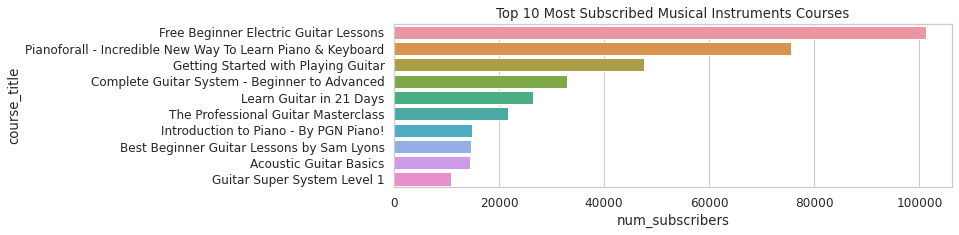

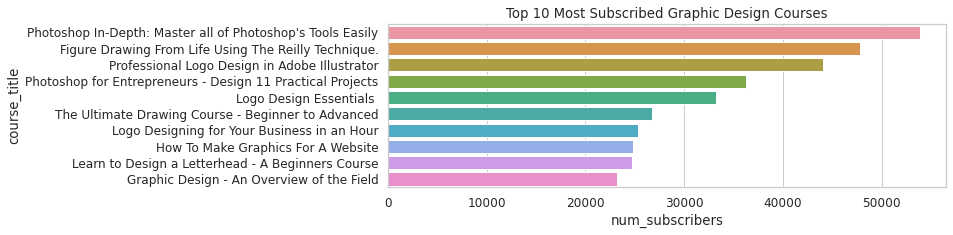

In [34]:
plt.figure(figsize = (10,3))
sns.barplot(data = udemy_DF[udemy_DF['subject'] == 'Business Finance'].nlargest(10, 'num_subscribers'), 
            x = 'num_subscribers', y = 'course_title')
plt.title("Top 10 Most Subscribed Business Finance Courses")
plt.show()

plt.figure(figsize = (10,3))
sns.barplot(data = udemy_DF[udemy_DF['subject'] == 'Web Development'].nlargest(10, 'num_subscribers'), 
            x = 'num_subscribers', y = 'course_title')
plt.title("Top 10 Most Subscribed Web Development Courses")
plt.show()

plt.figure(figsize = (10,3))
sns.barplot(data = udemy_DF[udemy_DF['subject'] == 'Musical Instruments'].nlargest(10, 'num_subscribers'), 
            x = 'num_subscribers', y = 'course_title')
plt.title("Top 10 Most Subscribed Musical Instruments Courses")
plt.show()

plt.figure(figsize = (10,3))
sns.barplot(data = udemy_DF[udemy_DF['subject'] == 'Graphic Design'].nlargest(10, 'num_subscribers'), 
            x = 'num_subscribers', y = 'course_title')
plt.title("Top 10 Most Subscribed Graphic Design Courses")
plt.show()

# Most Reviewed Courses

## Top 10 Most Reviewed Courses

In [35]:
udemy_DF.nlargest(10, 'num_reviews')

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_date,published_year
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02 21:13:27+00:00,Web Development,2015-11-02,2015
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,2016-03-08 22:28:36+00:00,Web Development,2016-03-08,2016
3204,756150,Angular 4 (formerly Angular 2) - The Complete ...,https://www.udemy.com/the-complete-guide-to-an...,True,190,73783,19649,329,All Levels,22.0,2016-02-11 07:29:29+00:00,Web Development,2016-02-11,2016
3247,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,True,175,79612,16976,85,All Levels,11.5,2015-03-12 23:19:54+00:00,Web Development,2015-03-12,2015
3254,705264,Modern React with Redux,https://www.udemy.com/react-redux/,True,180,50815,15117,150,All Levels,26.5,2015-12-28 19:20:21+00:00,Web Development,2015-12-28,2015
3246,289230,Learn and Understand AngularJS,https://www.udemy.com/learn-angularjs/,True,175,59361,11580,55,All Levels,7.0,2014-09-24 00:57:25+00:00,Web Development,2014-09-24,2014
3251,461160,Learn and Understand NodeJS,https://www.udemy.com/understand-nodejs/,True,195,58208,11123,98,All Levels,13.0,2015-08-31 21:07:48+00:00,Web Development,2015-08-31,2015
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14 07:03:41+00:00,Web Development,2013-02-14,2013
3228,719002,Angular 2 with TypeScript for Beginners: The P...,https://www.udemy.com/angular-2-tutorial-for-b...,True,150,40070,8341,194,All Levels,9.5,2016-03-03 20:17:59+00:00,Web Development,2016-03-03,2016
1979,238934,Pianoforall - Incredible New Way To Learn Pian...,https://www.udemy.com/pianoforall-incredible-n...,True,200,75499,7676,362,All Levels,30.0,2014-08-07 06:27:51+00:00,Musical Instruments,2014-08-07,2014


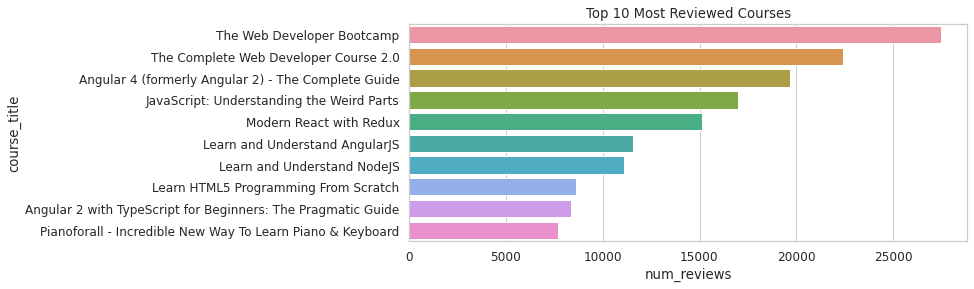

In [36]:
plt.figure(figsize = (10, 4))
sns.barplot(data = udemy_DF.nlargest(10, 'num_reviews'), 
            x = 'num_reviews', y = 'course_title')
plt.title(label = "Top 10 Most Reviewed Courses")
plt.show()

## Top 10 Most Reviewed Paid Courses

In [37]:
udemy_DF[udemy_DF['is_paid'] == True].nlargest(10, 'num_reviews')

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_date,published_year
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02 21:13:27+00:00,Web Development,2015-11-02,2015
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,2016-03-08 22:28:36+00:00,Web Development,2016-03-08,2016
3204,756150,Angular 4 (formerly Angular 2) - The Complete ...,https://www.udemy.com/the-complete-guide-to-an...,True,190,73783,19649,329,All Levels,22.0,2016-02-11 07:29:29+00:00,Web Development,2016-02-11,2016
3247,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,True,175,79612,16976,85,All Levels,11.5,2015-03-12 23:19:54+00:00,Web Development,2015-03-12,2015
3254,705264,Modern React with Redux,https://www.udemy.com/react-redux/,True,180,50815,15117,150,All Levels,26.5,2015-12-28 19:20:21+00:00,Web Development,2015-12-28,2015
3246,289230,Learn and Understand AngularJS,https://www.udemy.com/learn-angularjs/,True,175,59361,11580,55,All Levels,7.0,2014-09-24 00:57:25+00:00,Web Development,2014-09-24,2014
3251,461160,Learn and Understand NodeJS,https://www.udemy.com/understand-nodejs/,True,195,58208,11123,98,All Levels,13.0,2015-08-31 21:07:48+00:00,Web Development,2015-08-31,2015
3228,719002,Angular 2 with TypeScript for Beginners: The P...,https://www.udemy.com/angular-2-tutorial-for-b...,True,150,40070,8341,194,All Levels,9.5,2016-03-03 20:17:59+00:00,Web Development,2016-03-03,2016
1979,238934,Pianoforall - Incredible New Way To Learn Pian...,https://www.udemy.com/pianoforall-incredible-n...,True,200,75499,7676,362,All Levels,30.0,2014-08-07 06:27:51+00:00,Musical Instruments,2014-08-07,2014
3249,437398,Build Responsive Real World Websites with HTML...,https://www.udemy.com/design-and-develop-a-kil...,True,195,43977,7106,77,All Levels,12.0,2015-03-24 22:06:26+00:00,Web Development,2015-03-24,2015


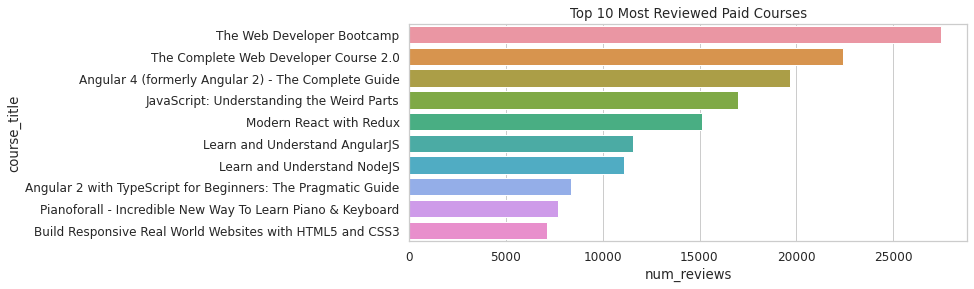

In [38]:
plt.figure(figsize = (10, 4))
sns.barplot(data = udemy_DF[udemy_DF['is_paid'] == True].nlargest(10, 'num_reviews'), 
            x = 'num_reviews', y = 'course_title')
plt.title(label = "Top 10 Most Reviewed Paid Courses")
plt.show()

## Top 10 Most Reviewed Free Courses

In [39]:
udemy_DF[udemy_DF['is_paid'] == False].nlargest(10, 'num_reviews')

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_date,published_year
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14 07:03:41+00:00,Web Development,2013-02-14,2013
2589,473160,Web Design for Web Developers: Build Beautiful...,https://www.udemy.com/web-design-secrets/,False,0,98867,6512,20,All Levels,3.0,2015-04-13 18:29:47+00:00,Web Development,2015-04-13,2015
2783,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,False,0,120291,5924,30,Beginner Level,3.0,2014-04-08 16:21:30+00:00,Web Development,2014-04-08,2014
3325,405926,HTML and CSS for Beginners - Build a Website &...,https://www.udemy.com/html-and-css-for-beginne...,False,0,70773,5660,50,All Levels,6.0,2015-03-19 19:07:12+00:00,Web Development,2015-03-19,2015
3385,707962,Javascript Essentials,https://www.udemy.com/javascript-essentials/,False,0,47062,5590,41,Beginner Level,8.5,2016-01-20 19:08:27+00:00,Web Development,2016-01-20,2016
3289,130064,Practical PHP: Master the Basics and Code Dyna...,https://www.udemy.com/code-dynamic-websites/,False,0,83737,4598,45,All Levels,6.5,2014-07-19 03:02:05+00:00,Web Development,2014-07-19,2014
143,48841,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes...,False,0,56659,4397,16,Beginner Level,1.5,2013-04-07 21:39:25+00:00,Business Finance,2013-04-07,2013
2592,314462,Quickstart AngularJS,https://www.udemy.com/quickstart-angularjs/,False,0,64128,4047,17,Beginner Level,1.5,2014-11-22 12:42:22+00:00,Web Development,2014-11-22,2014
103,133536,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,False,0,50855,2698,15,Beginner Level,1.5,2013-12-25 19:53:34+00:00,Business Finance,2013-12-25,2013
3219,128946,Learn Responsive Web Development from Scratch,https://www.udemy.com/learn-responsive-web-dev...,False,0,59639,2692,24,All Levels,4.5,2013-12-09 12:16:40+00:00,Web Development,2013-12-09,2013


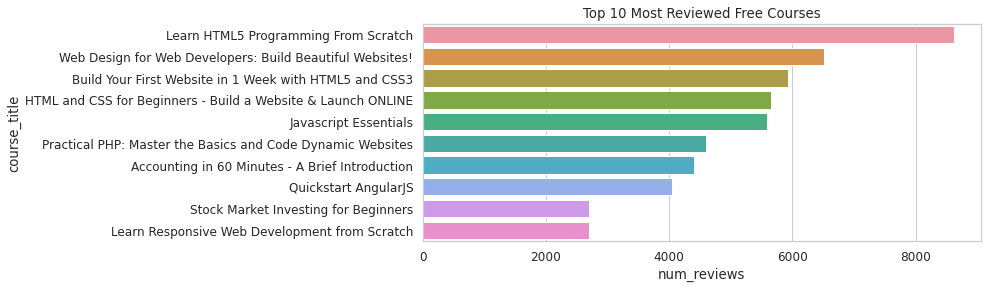

In [40]:
plt.figure(figsize = (10, 4))
sns.barplot(data = udemy_DF[udemy_DF['is_paid'] == False].nlargest(10, 'num_reviews'), 
            x = 'num_reviews', y = 'course_title')
plt.title(label = "Top 10 Most Reviewed Free Courses")
plt.show()

## Top 10 Most Reviewed Courses in terms of Subject

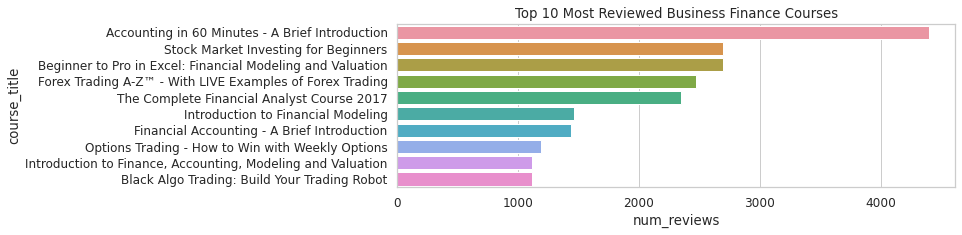

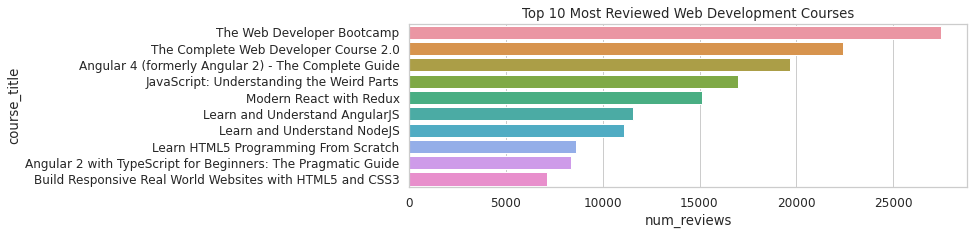

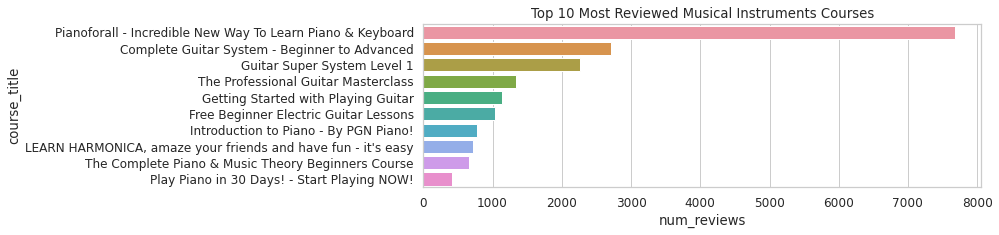

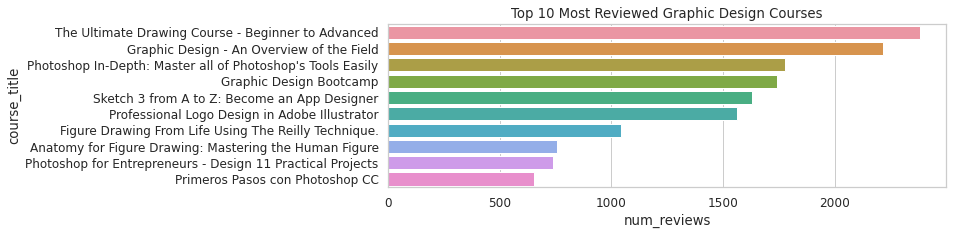

In [41]:
plt.figure(figsize = (10,3))
sns.barplot(data = udemy_DF[udemy_DF['subject'] == 'Business Finance'].nlargest(10, 'num_reviews'), 
            x = 'num_reviews', y = 'course_title')
plt.title("Top 10 Most Reviewed Business Finance Courses")
plt.show()

plt.figure(figsize = (10,3))
sns.barplot(data = udemy_DF[udemy_DF['subject'] == 'Web Development'].nlargest(10, 'num_reviews'), 
            x = 'num_reviews', y = 'course_title')
plt.title("Top 10 Most Reviewed Web Development Courses")
plt.show()

plt.figure(figsize = (10,3))
sns.barplot(data = udemy_DF[udemy_DF['subject'] == 'Musical Instruments'].nlargest(10, 'num_reviews'), 
            x = 'num_reviews', y = 'course_title')
plt.title("Top 10 Most Reviewed Musical Instruments Courses")
plt.show()

plt.figure(figsize = (10,3))
sns.barplot(data = udemy_DF[udemy_DF['subject'] == 'Graphic Design'].nlargest(10, 'num_reviews'), 
            x = 'num_reviews', y = 'course_title')
plt.title("Top 10 Most Reviewed Graphic Design Courses")
plt.show()


# Analyzing the Subjects

## Available Paid and Free Courses for the Subjects

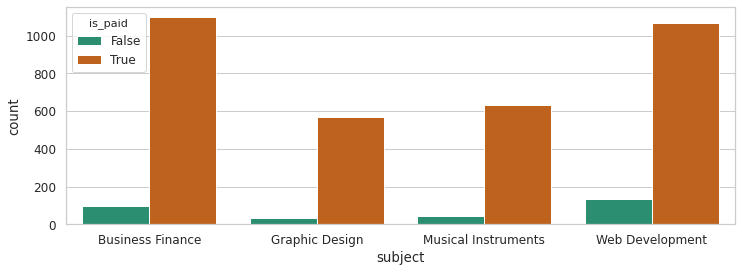

In [42]:
plt.figure(figsize = (12,4))
sns.countplot(data = udemy_DF, x = 'subject', hue = 'is_paid')
plt.show()

The majority of all the courses in each subject are paid.

## Difficulty Levels for Each Subject

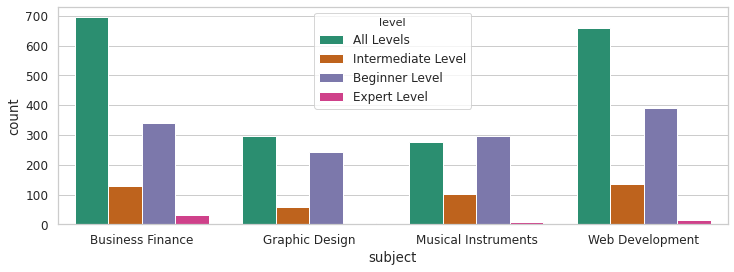

In [43]:
plt.figure(figsize = (12,4))
sns.countplot(data = udemy_DF, x = 'subject', hue = 'level')
plt.show()

'All Levels' is the majority diffculty level out of all the subjects, except for Musical Instruments, which has a majority of beginner level courses. 

## Year of Publication of Subjects

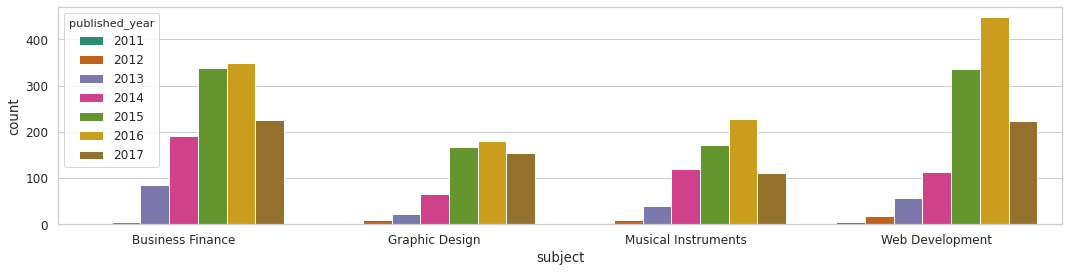

In [44]:
plt.figure(figsize = (18,4))
sns.countplot(data = udemy_DF, x = 'subject', hue = 'published_year')
plt.show()

In each subject, highest amount of courses were published in 2016.

## Prices of Subjects 

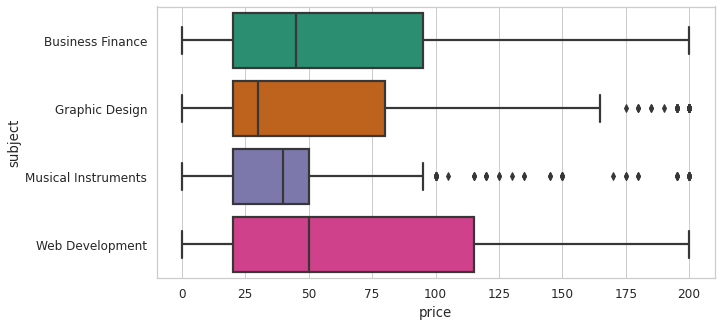

In [45]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = udemy_DF, x = 'price', y = 'subject', linewidth = 2.2)
plt.show()

In [46]:
udemy_DF.groupby(['subject']).describe()['price']

,count,mean,std,min,25%,50%,75%,max
subject,,,,,,,,
Business Finance,1194.0,68.592965,64.391446,0.0,20.0,45.0,95.0,200.0
Graphic Design,603.0,57.827529,57.211708,0.0,20.0,30.0,80.0,200.0
Musical Instruments,680.0,49.558824,41.187592,0.0,20.0,40.0,50.0,200.0
Web Development,1200.0,77.033333,66.080477,0.0,20.0,50.0,115.0,200.0


## Number of Subscribers for each Subject

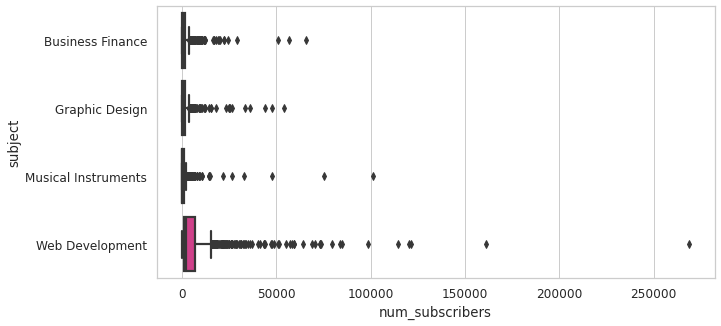

In [47]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = udemy_DF, x = 'num_subscribers', y = 'subject', linewidth = 2.2, showfliers = True)
plt.show()

In [48]:
udemy_DF.groupby(['subject']).describe()['num_subscribers']

,count,mean,std,min,25%,50%,75%,max
subject,,,,,,,,
Business Finance,1194.0,1565.084590,3914.253333,0.0,58.0,484.5,1604.00,65576.0
Graphic Design,603.0,1763.097844,4923.176517,0.0,34.5,384.0,1443.50,53851.0
Musical Instruments,680.0,1245.130882,5676.381419,0.0,31.0,138.0,870.25,101154.0
Web Development,1200.0,6650.476667,14613.648207,19.0,1127.5,2416.5,6894.75,268923.0


## Number of Reviews for each Subject

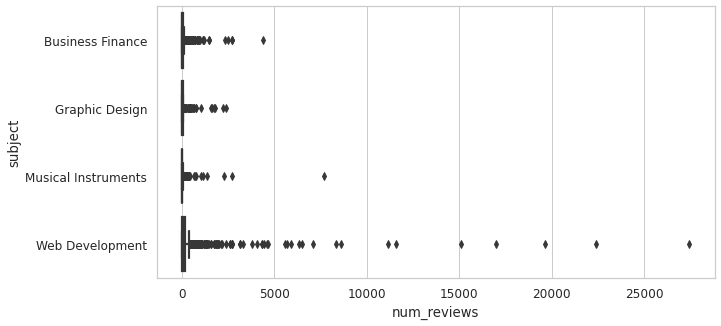

In [49]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = udemy_DF, x = 'num_reviews', y = 'subject', linewidth = 2.2, showfliers = True)
plt.show()

In [50]:
udemy_DF.groupby(['subject']).describe()['num_reviews']

,count,mean,std,min,25%,50%,75%,max
subject,,,,,,,,
Business Finance,1194.0,63.569514,235.932966,0.0,3.0,12.0,38.00,4397.0
Graphic Design,603.0,61.475954,213.061096,0.0,3.0,10.0,31.00,2379.0
Musical Instruments,680.0,46.652941,337.735677,0.0,2.0,5.0,17.00,7676.0
Web Development,1200.0,358.354167,1574.814468,0.0,25.0,65.0,179.25,27445.0


## Content Duration for each Subject

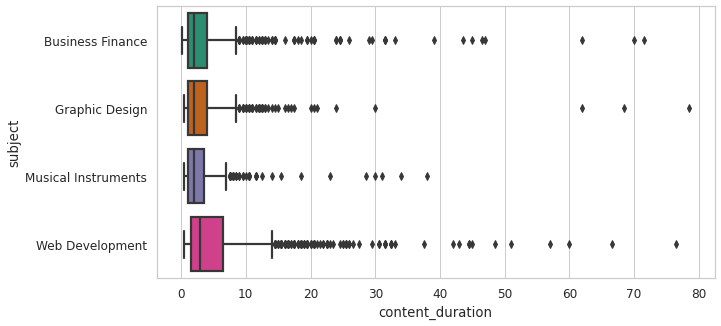

In [51]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = udemy_DF, x = 'content_duration', y = 'subject', linewidth = 2.2, showfliers = True)
plt.show()

In [52]:
udemy_DF.groupby(['subject']).describe()['content_duration']

,count,mean,std,min,25%,50%,75%,max
subject,,,,,,,,
Business Finance,1194.0,3.555974,5.667099,0.133333,1.0,2.0,4.0,71.5
Graphic Design,603.0,3.580542,5.903737,0.500000,1.0,2.0,4.0,78.5
Musical Instruments,680.0,2.854387,3.470463,0.483333,1.0,2.0,3.5,38.0
Web Development,1200.0,5.594792,7.249553,0.500000,1.5,3.0,6.5,76.5


# Correlation

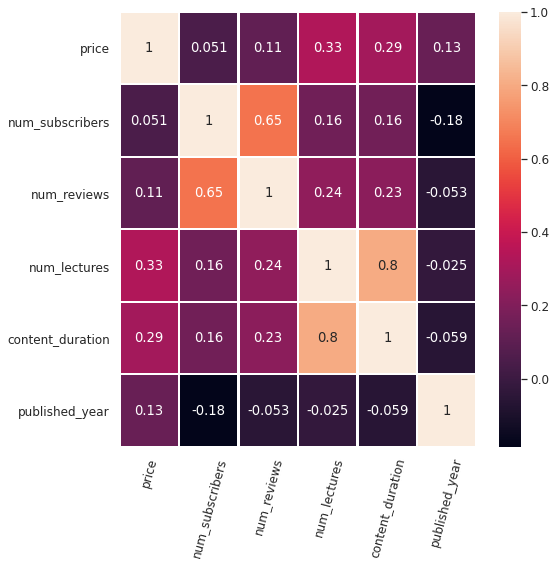

In [53]:
udemy_corr = udemy_DF[['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration', 'published_year']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(udemy_corr, annot = True, linewidths = 1.2, linecolor = 'white')
plt.xticks(rotation = 75)
plt.show()

The content duration and the number of lectures have a strong positive correlation, since more videos will obviously result in total longer durations. The number of reviews and number of subscribers have a strong positive correlation as well - higher the users, higher the number of reviews.

# Courses with No Reviews/Subscribers

As visible in the boxplots for the number of reviews and subscribers, there are courses that have no reviews and/or subscribers. Let's create two subsets, with one containing courses with no subscribers and other containing courses with no reviews.

In [54]:
udemy_DF_no_subs = udemy_DF[udemy_DF['num_subscribers'] == 0]
udemy_DF_no_revs = udemy_DF[udemy_DF['num_reviews'] == 0]

## General Description of Courses with No Subscribers

In [55]:
udemy_DF_no_subs[['num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']].describe()

,num_subscribers,num_reviews,num_lectures,content_duration
count,69.0,69.0,69.000000,69.000000
mean,0.0,0.0,13.246377,1.515942
std,0.0,0.0,7.974972,1.188491
min,0.0,0.0,5.000000,0.516667
25%,0.0,0.0,8.000000,0.616667
50%,0.0,0.0,10.000000,1.000000
75%,0.0,0.0,16.000000,2.000000
max,0.0,0.0,35.000000,6.000000


## General Description of Courses with No Reviews

In [56]:
udemy_DF_no_revs[['num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']].describe()

,num_subscribers,num_reviews,num_lectures,content_duration
count,288.000000,288.0,288.000000,288.000000
mean,69.607639,0.0,23.187500,2.403935
std,305.176494,0.0,27.699097,3.244365
min,0.000000,0.0,5.000000,0.500000
25%,1.000000,0.0,9.000000,1.000000
50%,3.500000,0.0,14.500000,1.500000
75%,11.250000,0.0,27.000000,3.000000
max,4259.000000,0.0,321.000000,31.500000


From the above 2 tables, we can say that all the courses that have 0 subscribers have 0 reviews. However, not all unreviewed courses have 0 subscribers. There are 69 courses with 0 subscribers and 288 courses with 0 reviews. This means that there are 219 unreviewed courses that have more than 0 subscribers.

In [57]:
udemy_DF_no_revs[udemy_DF_no_revs['num_subscribers'] > 0].nlargest(5, 'num_subscribers')

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_date,published_year
2588,810550,Effective Personal Website Building and Hosting,https://www.udemy.com/effective-personal-websi...,True,20,4259,0,11,All Levels,1.000000,2016-04-11 22:36:52+00:00,Web Development,2016-04-11,2016
899,615602,Valuation of Goodwill for CA / CFA / CMA Exams,https://www.udemy.com/valuation-of-goodwill/,True,20,1509,0,9,All Levels,0.716667,2015-09-23 17:16:11+00:00,Business Finance,2015-09-23,2015
869,442114,Take Control By Learning The Stock Market Now,https://www.udemy.com/stock-market-crash-course/,True,30,1440,0,21,Beginner Level,1.000000,2015-03-10 01:15:35+00:00,Business Finance,2015-03-10,2015
1585,727510,How To Become An Etsy Wholesale Seller,https://www.udemy.com/how-to-become-an-etsy-wh...,True,100,1013,0,25,Beginner Level,2.500000,2016-03-29 22:34:30+00:00,Graphic Design,2016-03-29,2016
213,1266148,Preparation of Consolidated Financial Statemen...,https://www.udemy.com/preparation-of-consolida...,False,0,965,0,18,Intermediate Level,1.500000,2017-06-28 20:37:13+00:00,Business Finance,2017-06-28,2017


The most subscribed course that has no reviews is "Effective Personal Website Building and Hosting", with 4259 subscribers.

## Paid/Free Courses, Difficulty Level and Subject

The graphs on the left are for courses with no subscribers and the column on the right is for courses with no reviews.

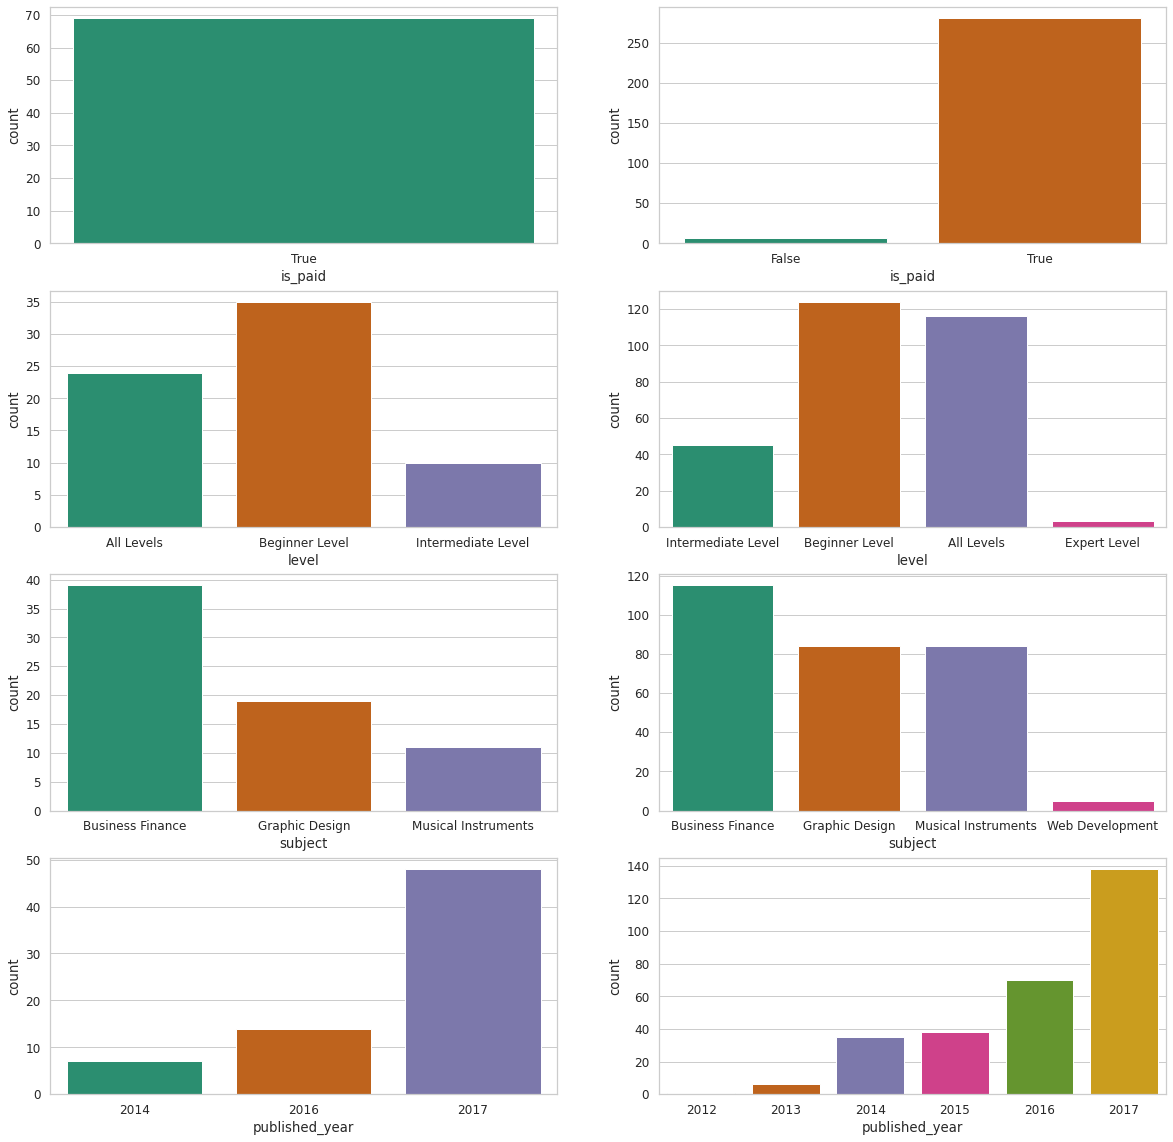

In [58]:
f, ax1 = plt.subplots(4, 2, figsize = (20, 20))
sns.countplot(data = udemy_DF_no_subs, x = "is_paid", ax = ax1[0,0])
sns.countplot(data = udemy_DF_no_revs, x = "is_paid", ax = ax1[0,1])
sns.countplot(data = udemy_DF_no_subs, x = "level", ax = ax1[1,0])
sns.countplot(data = udemy_DF_no_revs, x = "level", ax = ax1[1,1])
sns.countplot(data = udemy_DF_no_subs, x = "subject", ax = ax1[2,0])
sns.countplot(data = udemy_DF_no_revs, x = "subject", ax = ax1[2,1])
sns.countplot(data = udemy_DF_no_subs, x = "published_year", ax = ax1[3,0])
sns.countplot(data = udemy_DF_no_revs, x = "published_year", ax = ax1[3,1])
plt.show()

In [59]:
udemy_DF_no_revs.groupby(['published_year']).count()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_date
published_year,,,,,,,,,,,,,
2012,1,1,1,1,1,1,1,1,1,1,1,1,1
2013,6,6,6,6,6,6,6,6,6,6,6,6,6
2014,35,35,35,35,35,35,35,35,35,35,35,35,35
2015,38,38,38,38,38,38,38,38,38,38,38,38,38
2016,70,70,70,70,70,70,70,70,70,70,70,70,70
2017,138,138,138,138,138,138,138,138,138,138,138,138,138


* Paid/Free Courses: All the unsubscribed courses are paid. 97.6% of unreviewed courses are paid.
* Difficulty Level: Both unsubscribed and unreviewed courses have beginner courses in the majority (50.7% and 43.05% respectively). 40.3% of all unreviewed courses have all the difficulty levels. The unsubscribed courses have no expert level courses.
* Subject: There are no Web Development courses that have 0 subscribers. Business Finance courses are the majority in both cases (56.5% for unsubscribed and 39.9% for unreviewed). There are an equal amount of unreviewed Musical Instruments and Graphic Design courses - each constitutes 29.2% of all unreviewed courses. 
* Published Year: In both cases, 2017 is the majority (69.6% for unsubscribed and 47.9% for unreviewed). A possible reason could be because users might not have come across the newer courses. There are no unsubscribed and unreviewed courses in 2011. There are no unsubscribed courses in 2011, 2012, 2013 and 2015.

## Price, Number of Lectures and Content Duration

The graphs on the left are for courses with no subscribers and the column on the right is for courses with no reviews.

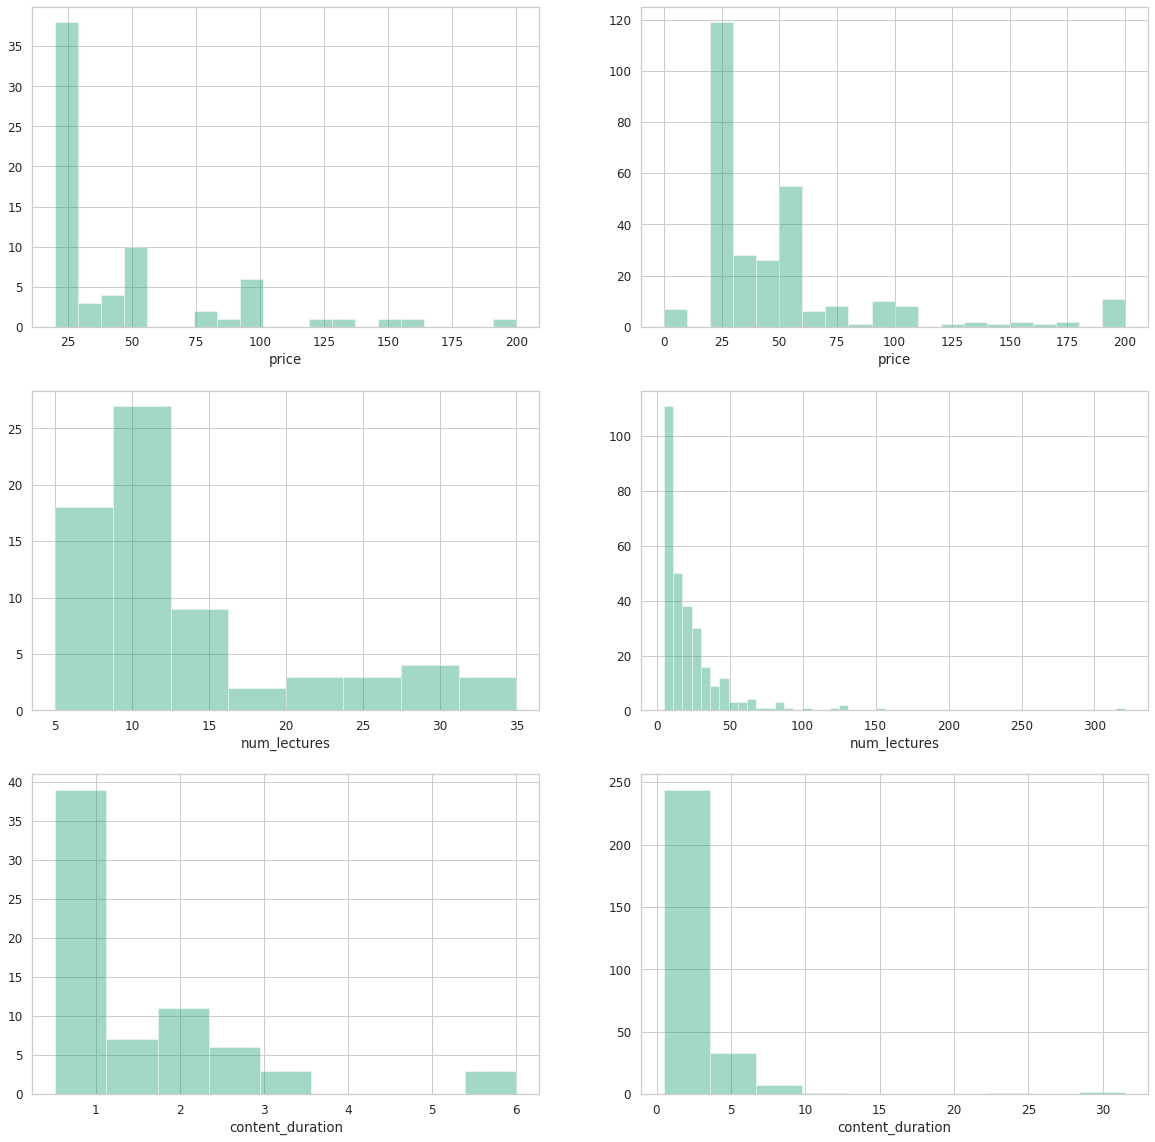

In [60]:
f, ax2 = plt.subplots(3, 2, figsize = (20, 20))
sns.distplot(udemy_DF_no_subs['price'], ax = ax2[0,0], kde = False, bins = 20)
sns.distplot(udemy_DF_no_revs['price'], ax = ax2[0,1], kde = False, bins = 20)
sns.distplot(udemy_DF_no_subs['num_lectures'], ax = ax2[1,0], kde = False)
sns.distplot(udemy_DF_no_revs['num_lectures'], ax = ax2[1,1], kde = False)
sns.distplot(udemy_DF_no_subs['content_duration'], ax = ax2[2,0], kde = False)
sns.distplot(udemy_DF_no_revs['content_duration'], ax = ax2[2,1], kde = False, bins = 10)
plt.show()

* All the graphs are right-skewed. 
* Most of the prices for unsubscribed and unreviewed courses lie between 0 to 50 dollars. The maximum in both cases are 200 dollars. 
* Unsubscribed courses majorly have around 10 lectures, with 35 being the maximum. Unreviewed courses majorly have between 0 and 50 lectures, with the highest number of lectures being 321. Both courses have a minimum of 5 lectures.
* The longest amount of content for unsubscribed courses is 6 hours, whereas it is 31.5 hours for unreviewed courses. Majority of unsubscribed courses have content duration of almost 1 hour, while majority of unreviewed courses are approximately between 0.5 to 3 hours.